# Mini-project IIIa: Bayesian Optimization

## Import modules

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy.stats import multivariate_normal

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("darkgrid"); sns.set_context("talk")

import GPy
import GPyOpt   # This will do the Bayesian optimization

## 1. A univariate example with GPyOpt

Try to minimize the function

$$
\sin(3\theta) + \theta^2 - 0.7 \theta
$$

on the interval $\theta \in [-1,2]$.

a. **Plot the true function**

In [2]:
xmin =  -1.
xmax =  2.

def Ftrue(x):
    """Example true function, with two local minima in [0,1]."""
    return np.sin(3*x) + x**2 - 0.7*x

b. Find the minimum using `scipy.optimize.minimize`. Plot in the figure with the true function. Repeat with a few different seeds for the starting point. 

**Do you always get the same minimum?**
<br>

We do get the same minimum each time. I keep getting -0.5 since it is the global minimum. 

In [3]:
np.random.seed()  # (123)
x0 = np.random.uniform(xmin, xmax)  # pick a random starting guess in [0,1]
result = sp.optimize.minimize(Ftrue, x0)  # use scipy to minimize the function
print(result)

      fun: -0.5003596276665307
 hess_inv: array([[0.1008224]])
      jac: array([9.76026058e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([-0.35939441])


c. Use Bayesian Optimization with GPyOpt (following the example in the lecture notebook).

**Plot the statistical model and the acquisition function for the first ten iterations. Also plot the final summary of the BayesOpt convergence sequence.**

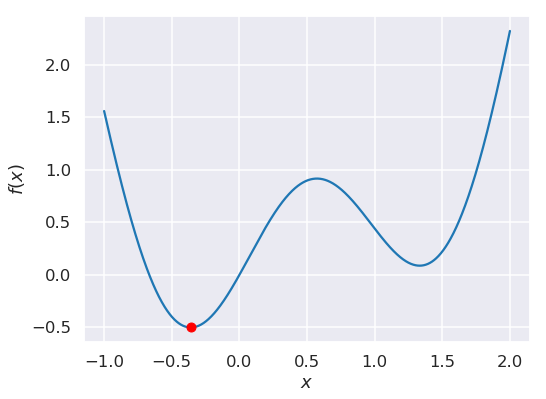

In [4]:
X_domain = np.linspace(xmin,xmax,1000)

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.plot(X_domain, Ftrue(X_domain))
ax.plot(result.x[0], result.fun, 'ro')
ax.set(xlabel=r'$x$', ylabel=r'$f(x)$');

In [5]:
# parameter bound(s) 
bounds = [{'name': 'x_1', 'type': 'continuous', 'domain': (xmin,xmax)}]
# We'll consider two choices for the acquisition function, expectived 
#  improvement (EI) and lower confidence bound (LCB)
my_acquisition_type = 'EI'
#my_acquisition_type = 'LCB'

# Creates GPyOpt object with the model and aquisition function
myBopt = GPyOpt.methods.BayesianOptimization(\
            f=Ftrue,                  # function to optimize   
            initial_design_numdata=1, # Start with two initial data
            domain=bounds,            # box-constraints of the problem
            acquisition_type=my_acquisition_type, # Selects acquisition type
            exact_feval = True) 
# Run the optimization
np.random.seed(123)   # (123)
max_iter = 1      # evaluation budget (max_iter=1 means one step at a time)
max_time = 60     # time budget 
eps      = 1.e-6  # minimum allowed distance between the last two observations

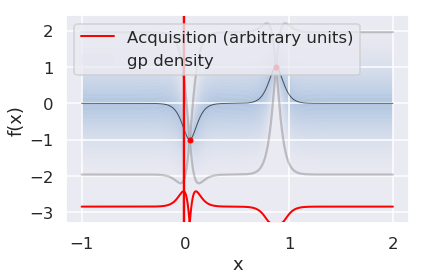

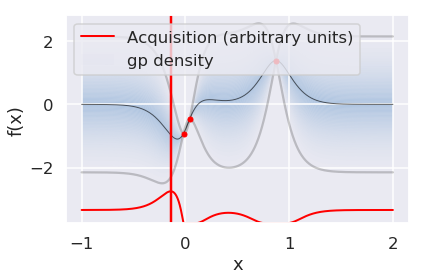

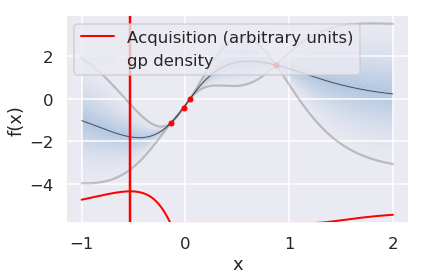

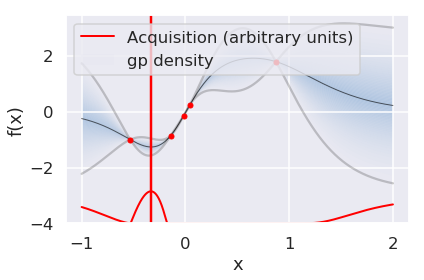

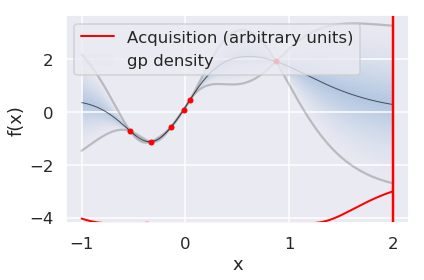

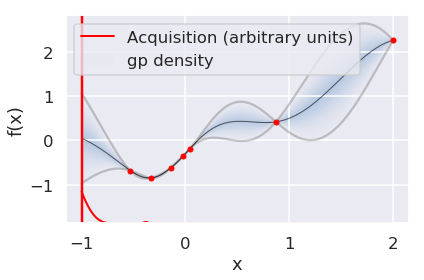

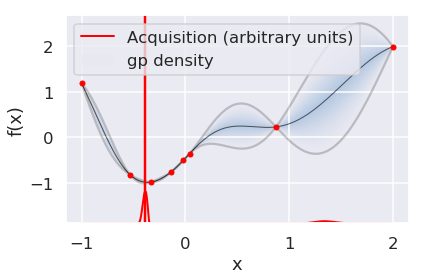

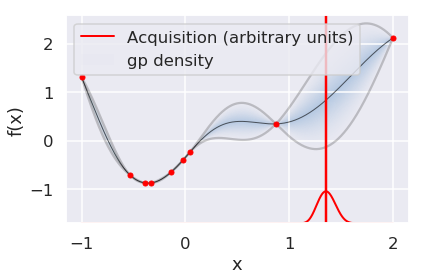

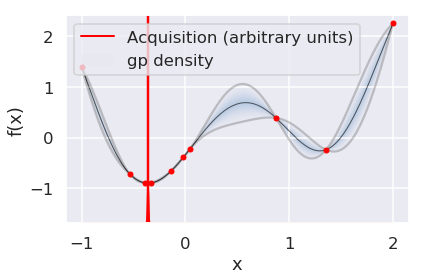

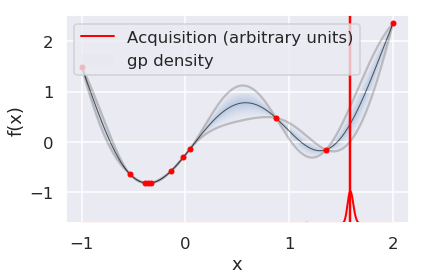

In [6]:
# run for num_iter iterations
num_iter = 10
for i in range(num_iter):
    myBopt.run_optimization(max_iter, max_time, eps)                     
    myBopt.plot_acquisition()

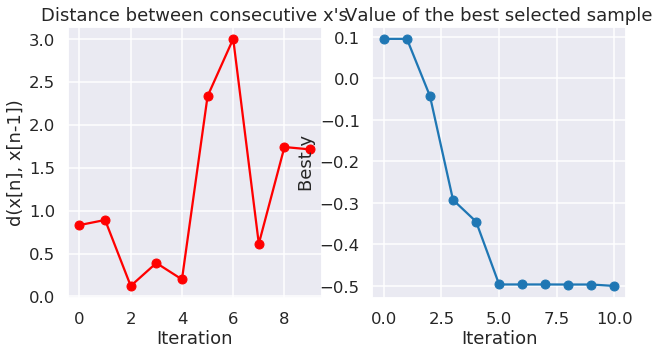

Optimal x value = [-0.35784735]
Minimized function value = -0.50035


In [7]:
myBopt.plot_convergence()
print(f'Optimal x value = {myBopt.x_opt}')
print(f'Minimized function value = {myBopt.fx_opt:.5f}')

d. Change the acquisition function to 'LCB'. Make sure to plot the iterations. 

**How do the acquisition functions compare when it comes to exploration-exploitation?**
<br>

The LCB explores less space compare to the EI. 
<br><br>

In [8]:
# parameter bound(s) 
bounds = [{'name': 'x_1', 'type': 'continuous', 'domain': (xmin,xmax)}]
# We'll consider two choices for the acquisition function, expectived 
#  improvement (EI) and lower confidence bound (LCB)
#my_acquisition_type = 'EI'
my_acquisition_type = 'LCB'

# Creates GPyOpt object with the model and aquisition function
myBopt = GPyOpt.methods.BayesianOptimization(\
            f=Ftrue,                  # function to optimize   
            initial_design_numdata=1, # Start with two initial data
            domain=bounds,            # box-constraints of the problem
            acquisition_type=my_acquisition_type, # Selects acquisition type
            exact_feval = True) 
# Run the optimization
np.random.seed(123)   # (123)
max_iter = 1      # evaluation budget (max_iter=1 means one step at a time)
max_time = 60     # time budget 
eps      = 1.e-6  # minimum allowed distance between the last two observations

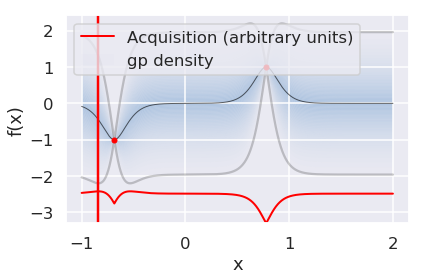

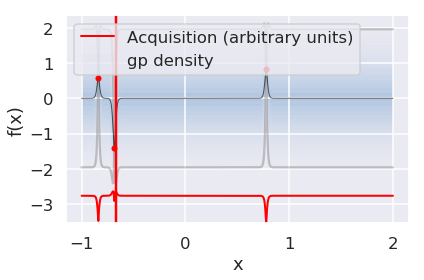

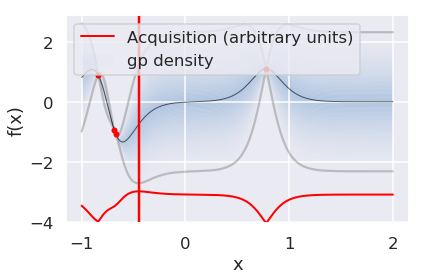

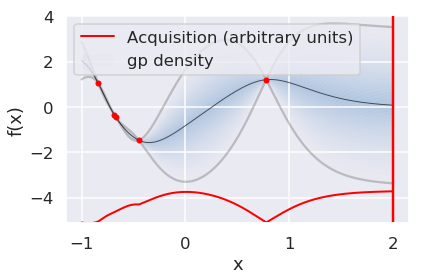

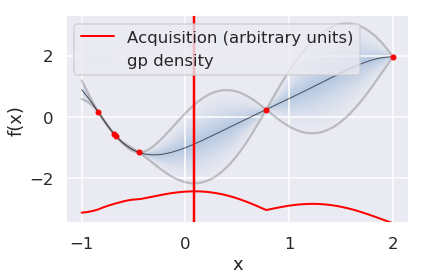

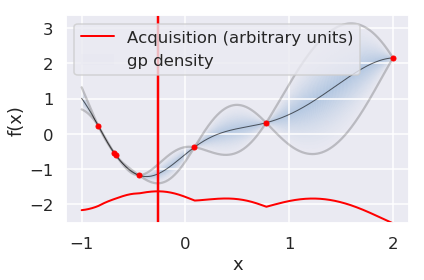

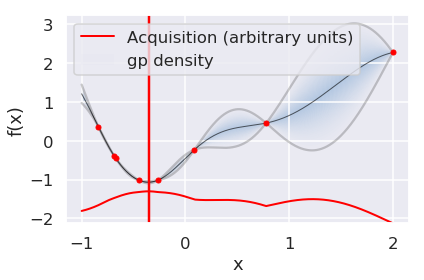

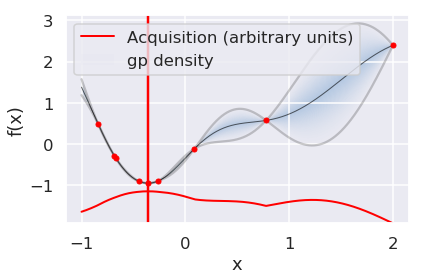

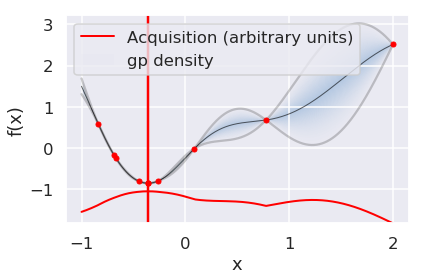

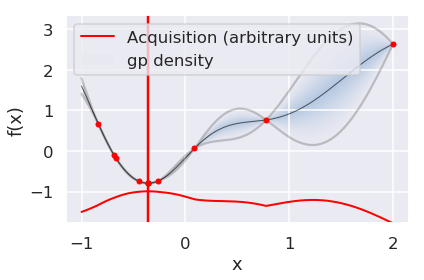

In [9]:
# run for num_iter iterations
num_iter = 10
for i in range(num_iter):
    myBopt.run_optimization(max_iter, max_time, eps)                     
    myBopt.plot_acquisition()

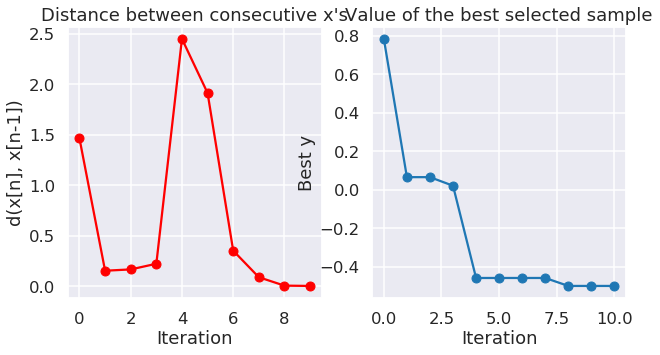

Optimal x value = [-0.35855116]
Minimized function value = -0.50036


In [10]:
myBopt.plot_convergence()
print(f'Optimal x value = {myBopt.x_opt}')
print(f'Minimized function value = {myBopt.fx_opt:.5f}')

e. **Repeat with noise added to the true function when generating data.**

* Assuming that we have an input parameter vector `X`, and that we have defined `noise = 0.2`. Then we can create some noise with normal distribution using
```python
noise * np.random.randn(*X.shape)
```
* Redefine your "true" function so that it returns results with such noise and repeat the `GPyOpt` implementation (see the 2-parameter example in the lecture notebook).
* It is important that your GP expects a noisy function. You must set `exact_feval = False` in `GPyOpt.methods.BayesianOptimization`.
* Plot several samples from the "noisy" true function (using e.g. `alpha=0.1` to make them semi-transparent). Also plot the true function without noise.
* Perform the Bayesian optimization. Study the convergence, but also the statistical model. **How is it different compared to the statistical model in the example without noise?**
<br>

Fewer spaces are explored and the iterations does not arrive at a different minimum function value in the statistical model with noise compared to the one without noise. 

In [11]:
def Fnoise(x, noise=0.2):
    loud = noise * np.random.randn(*x.shape)
    return loud + Ftrue(x)

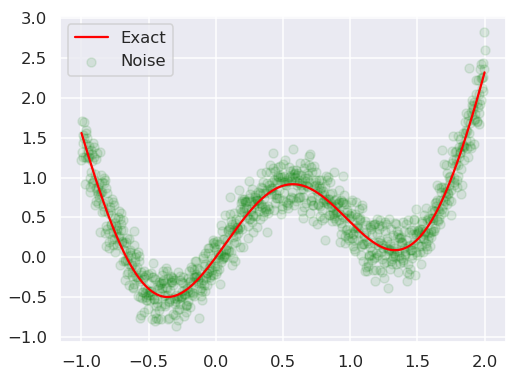

In [12]:
X_domain1 = np.linspace(xmin,xmax,1000)
X_domain2 = np.linspace(xmin,xmax,1000)

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.scatter(X_domain2, Fnoise(X_domain2), alpha = 0.1, color = 'green', label = 'Noise') 
ax.plot(X_domain1, Ftrue(X_domain1), color = 'red', label = 'Exact')
ax.legend()
plt.show()

In [13]:
# parameter bound(s) 
bounds = [{'name': 'x_1', 'type': 'continuous', 'domain': (xmin,xmax)}]
# We'll consider two choices for the acquisition function, expectived 
#  improvement (EI) and lower confidence bound (LCB)
my_acquisition_type = 'EI'
#my_acquisition_type = 'LCB'

# Creates GPyOpt object with the model and aquisition function
myBopt = GPyOpt.methods.BayesianOptimization(\
            f=Fnoise,                  # function to optimize   
            initial_design_numdata=1, # Start with two initial data
            domain=bounds,            # box-constraints of the problem
            acquisition_type=my_acquisition_type, # Selects acquisition type
            exact_feval = False) 
# Run the optimization
np.random.seed(123)   # (123)
max_iter = 1      # evaluation budget (max_iter=1 means one step at a time)
max_time = 60     # time budget 
eps      = 1.e-6  # minimum allowed distance between the last two observations

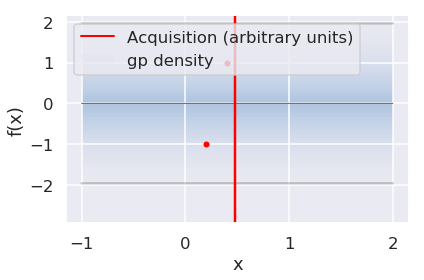

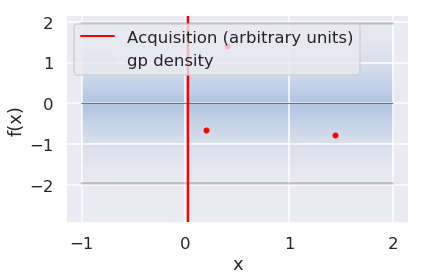

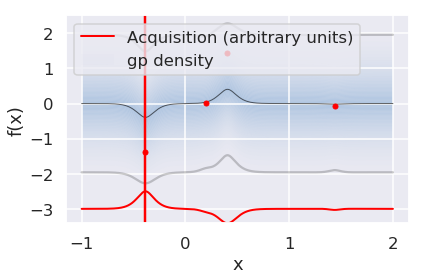

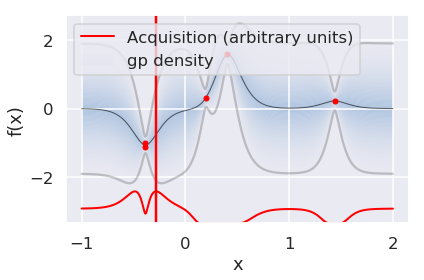

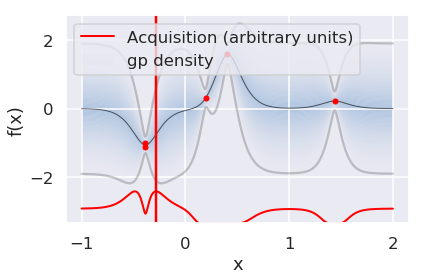

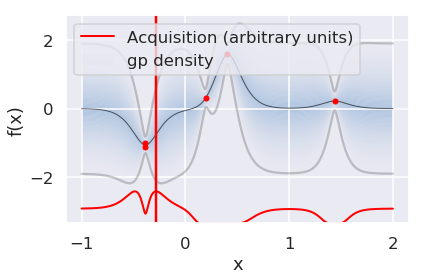

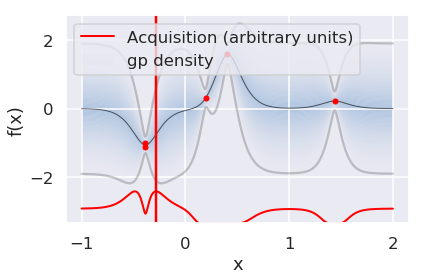

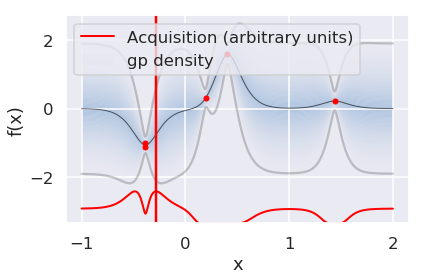

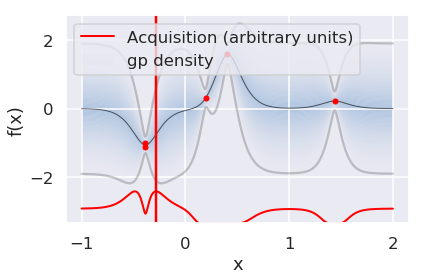

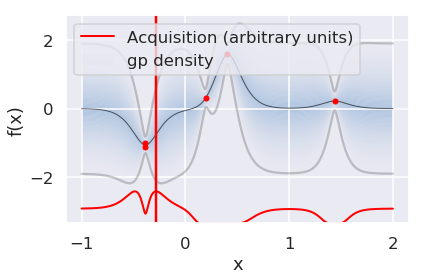

In [14]:
# run for num_iter iterations
num_iter = 10
for i in range(num_iter):
    myBopt.run_optimization(max_iter, max_time, eps)                     
    myBopt.plot_acquisition()

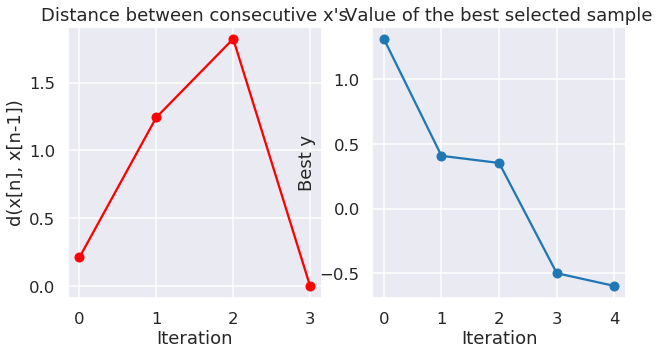

Optimal x value = [-0.38489938]
Minimized function value = -0.59923


In [15]:
myBopt.plot_convergence()
print(f'Optimal x value = {myBopt.x_opt}')
print(f'Minimized function value = {myBopt.fx_opt:.5f}')

f. **Build the statistical model in BayesOpt with a different kernel.** 

* Try in particular with the `Matern32` kernel. Do you remember what it looks like?
* Define a GPy kernel with your initial guess variance and lengthscale
```python
GPkernel = GPy.kern.Matern32(input_dim=1, variance=1.0, lengthscale=1.0)
```
* Include this kernel as an input argument to `GPyOpt.methods.BayesianOptimization` 
```python
optimizer = BayesianOptimization(f=fNoise, 
                                 model_type='GP',
                                 kernel=GPkernel, 
                                 ...
```


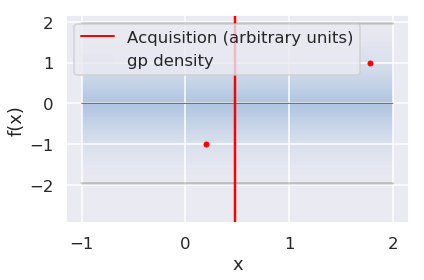

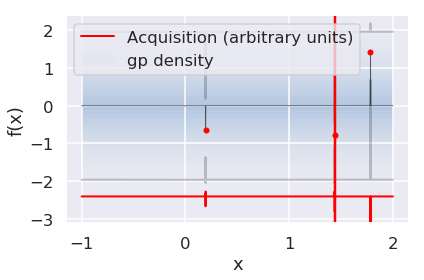

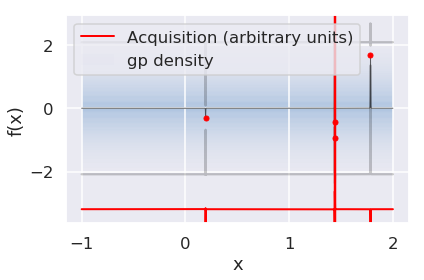

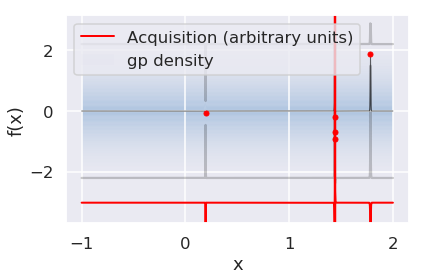

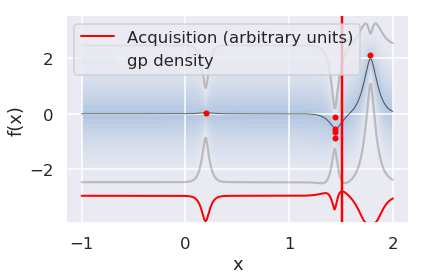

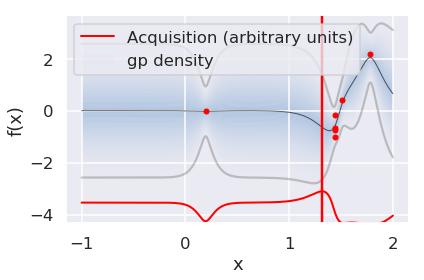

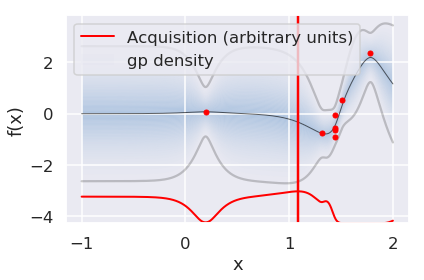

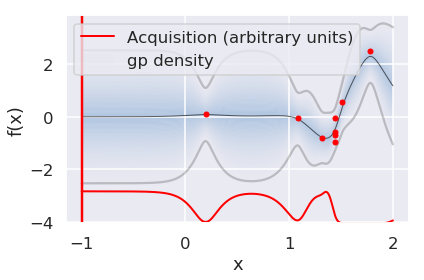

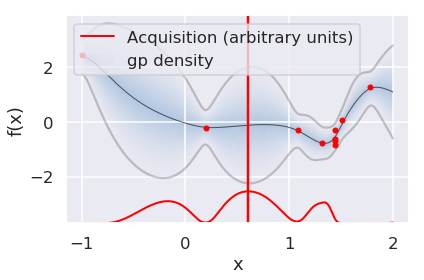

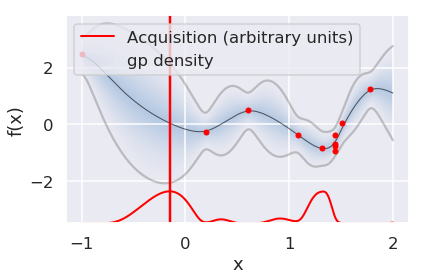

In [16]:
bounds = [{'name': 'x_1', 'type': 'continuous', 'domain': (xmin,xmax)}]
my_acquisition_type = 'EI'
#my_acquisition_type = 'LCB'

GPkernel = GPy.kern.Matern32(input_dim=1, variance=1.0, lengthscale=1.0)
optimizer = GPyOpt.methods.BayesianOptimization(f=Fnoise, 
                                 model_type='GP',
                                 kernel=GPkernel, 
                                 initial_design_numdata=1, # Start with two initial data
                                 domain=bounds,            # box-constraints of the problem
                                 acquisition_type=my_acquisition_type, # Selects acquisition type
                                 exact_feval = False) 

np.random.seed(123)   # (123)
max_iter = 1      # evaluation budget (max_iter=1 means one step at a time)
max_time = 60     # time budget 
eps      = 1.e-6  # minimum allowed distance between the last two observations
# run for num_iter iterations
num_iter = 10
for i in range(num_iter):
    optimizer.run_optimization(max_iter, max_time, eps)                     
    optimizer.plot_acquisition()

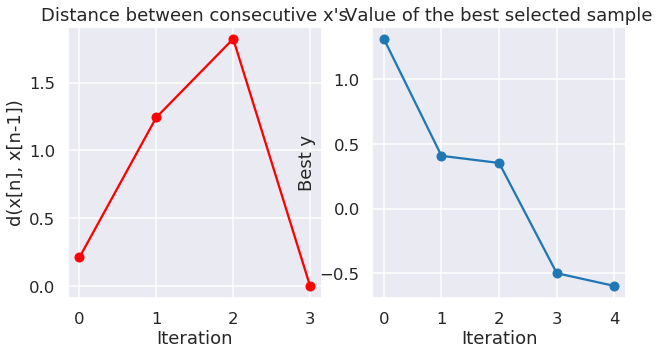

Optimal x value = [-0.38489938]
Minimized function value = -0.59923


In [17]:
myBopt.plot_convergence()
print(f'Optimal x value = {myBopt.x_opt}')
print(f'Minimized function value = {myBopt.fx_opt:.5f}')

**Questions to answer:**
* Can you decide if any of these kernels work better for this problem then the other? 
<br>

The RBF works bettter and it also explores the space more. 
<br><br>

* What is the observable difference between the posterior function in this experiment compared to the previous one with the default `RBF` kernel?
<br>

There posterior variation is larger for this kernel compared to the RBF kernel. 
<br><br>

* How would you decide which kernel to use for your problem?**
<br>

I would decide to use whichever kernel explores the most space/selected region giving min and max points. I would that would give a large posterior variation. In addition, I would keep these in mind and pick a kernel that's not as computionally expensive depending on how much data we have.
<br><br>

## 3. Test on bivariate example **(Do this for a plus)**

Use your own BayesOpt implementation, or the GPy one, to find the minimum of the following objective function:

In [18]:
def langermann(x):
    """
    Langermann test objective function.
    Args: 
    x: Two-dimensional point; format: [[x0, x1]] 
    Returns: Function value 
    """

    x=np.asarray(x[0]) # for compatibility with GPyOpt
    
    a = [3,5,2,1,7]
    b = [5,2,1,4,9]
    c = [1,2,5,2,3]
    
    return -sum(c*np.exp(-(1/np.pi)*((x[0]-a)**2 + (x[1]-b)**2))*np.cos(np.pi*((x[0]-a)**2 + (x[1]-b)**2)))

**Be sure to investigate different choices for the acquisition function and for the covariance function of your statistical model. In particular, be sure to compare the `RBF` and `Matern32` kernels.**

### RBF Kernel:

In [19]:
# parameter bound(s) 
bounds = [{'name': 'x_1', 'type': 'continuous', 'domain': (xmin,xmax)},
         {'name': 'x_2', 'type': 'continuous', 'domain': (xmin,xmax)}]
# We'll consider two choices for the acquisition function, expectived 
#  improvement (EI) and lower confidence bound (LCB)
my_acquisition_type = 'EI'
#my_acquisition_type = 'LCB'

# Creates GPyOpt object with the model and aquisition function
myBopt = GPyOpt.methods.BayesianOptimization(\
            f=langermann,                  # function to optimize   
            initial_design_numdata=1, # Start with two initial data
            domain=bounds,            # box-constraints of the problem
            acquisition_type=my_acquisition_type, # Selects acquisition type
            exact_feval = True) 
# Run the optimization
np.random.seed(123)   # (123)
max_iter = 1      # evaluation budget (max_iter=1 means one step at a time)
max_time = 60     # time budget 
eps      = 1.e-6  # minimum allowed distance between the last two observations

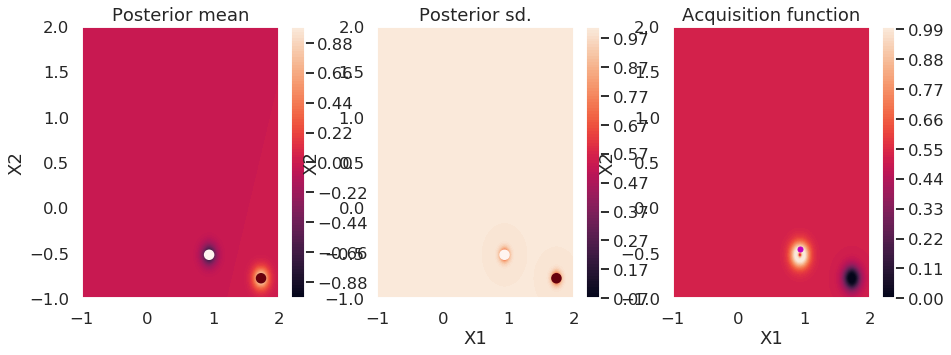

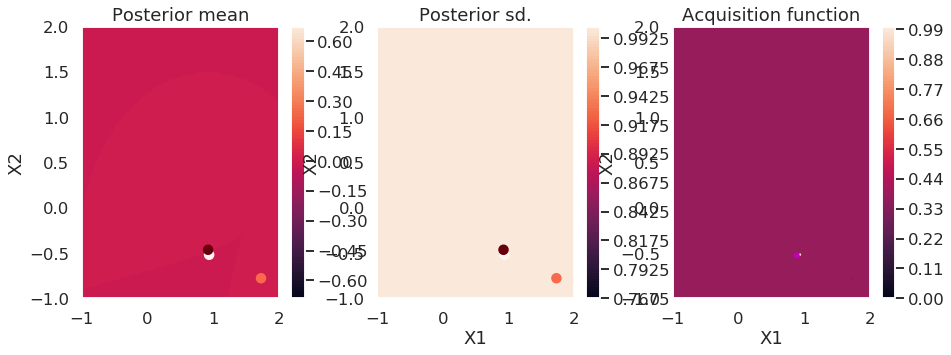

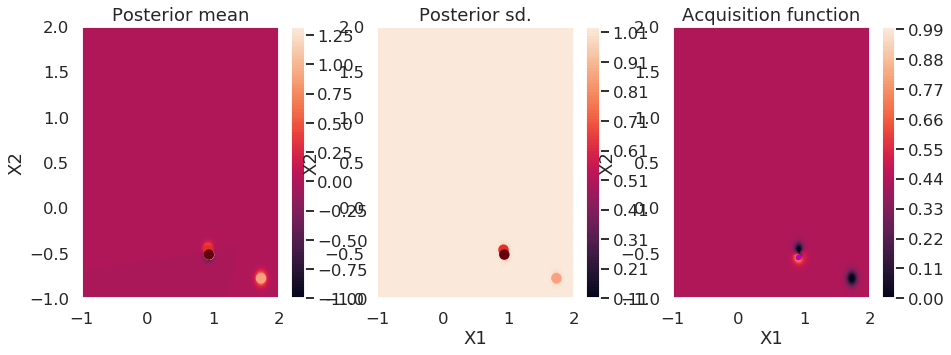

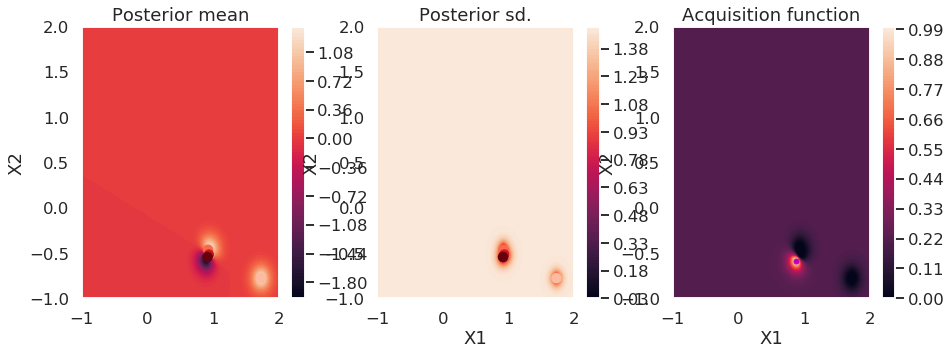

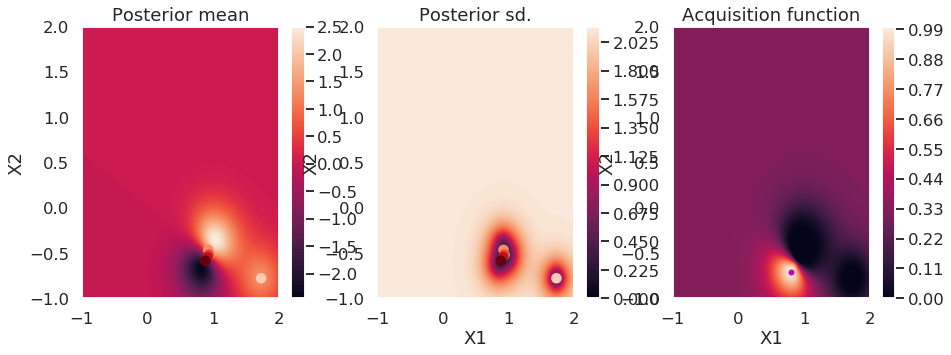

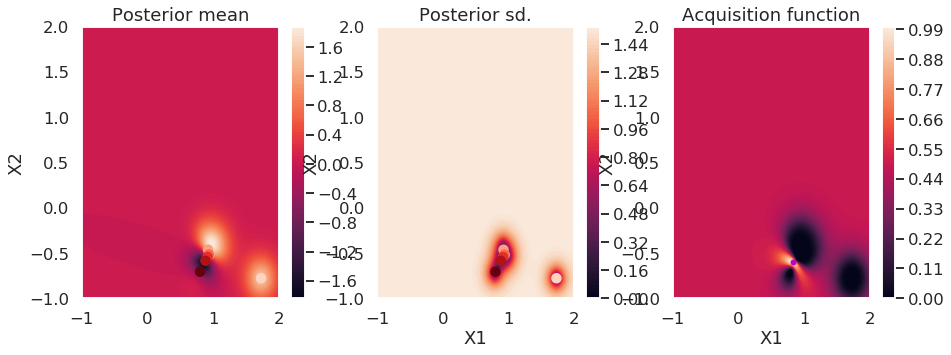

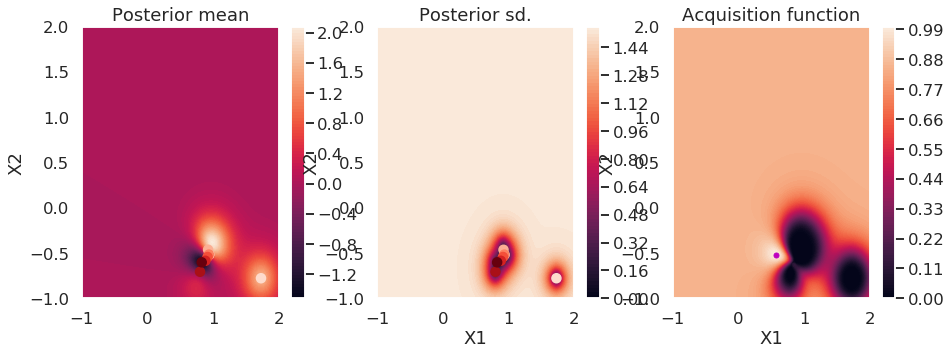

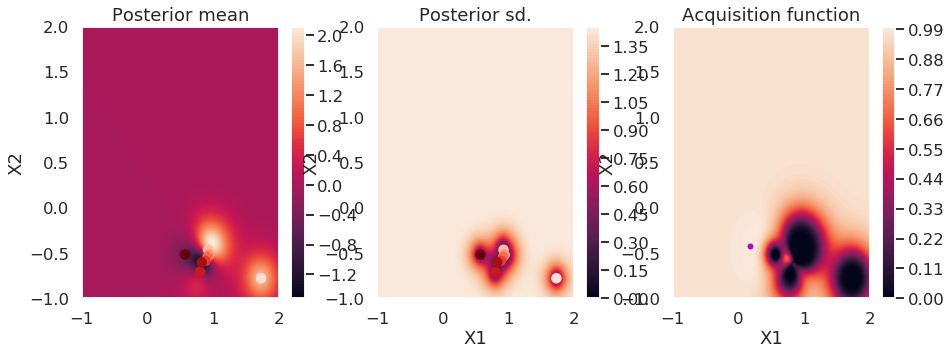

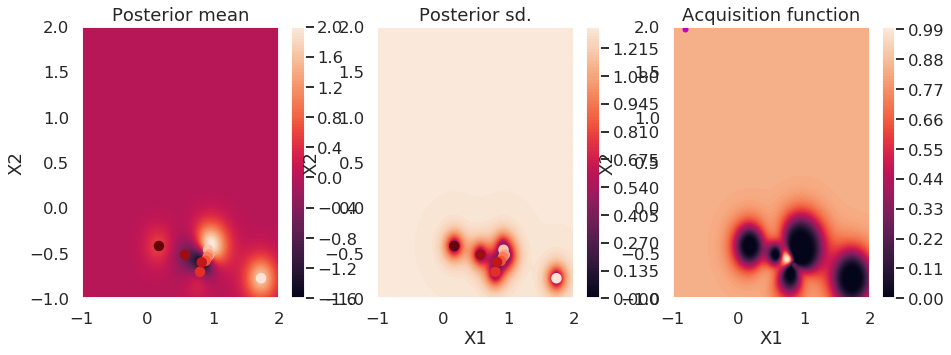

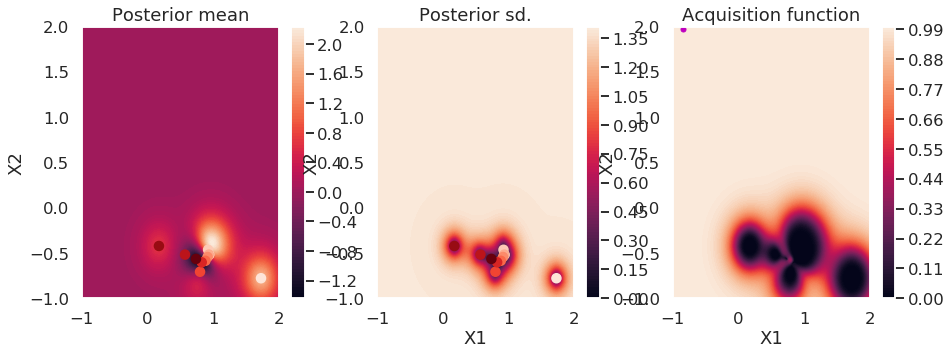

In [20]:
# run for num_iter iterations
num_iter = 10
for i in range(num_iter):
    myBopt.run_optimization(max_iter, max_time, eps)                     
    myBopt.plot_acquisition()

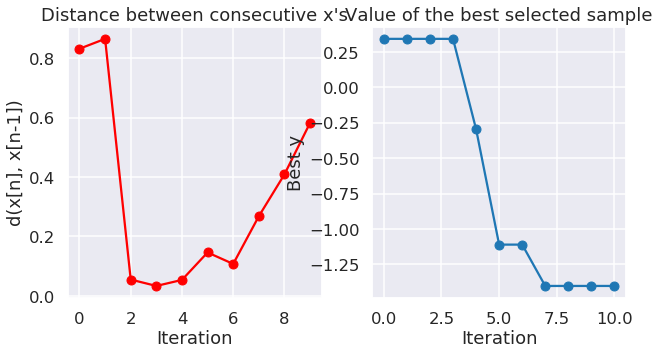

Optimal x value = [ 0.82640038 -0.60258708]
Minimized function value = -1.40225


In [21]:
myBopt.plot_convergence()
print(f'Optimal x value = {myBopt.x_opt}')
print(f'Minimized function value = {myBopt.fx_opt:.5f}')

In [22]:
# parameter bound(s) 
bounds = [{'name': 'x_1', 'type': 'continuous', 'domain': (xmin,xmax)},
         {'name': 'x_2', 'type': 'continuous', 'domain': (xmin,xmax)}]
# We'll consider two choices for the acquisition function, expectived 
#  improvement (EI) and lower confidence bound (LCB)
#my_acquisition_type = 'EI'
my_acquisition_type = 'LCB'

# Creates GPyOpt object with the model and aquisition function
myBopt = GPyOpt.methods.BayesianOptimization(\
            f=langermann,                  # function to optimize   
            initial_design_numdata=1, # Start with two initial data
            domain=bounds,            # box-constraints of the problem
            acquisition_type=my_acquisition_type, # Selects acquisition type
            exact_feval = True) 
# Run the optimization
np.random.seed(123)   # (123)
max_iter = 1      # evaluation budget (max_iter=1 means one step at a time)
max_time = 60     # time budget 
eps      = 1.e-6  # minimum allowed distance between the last two observations

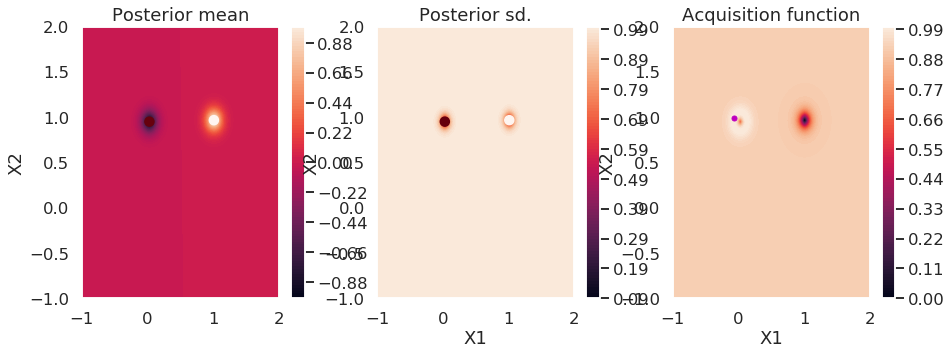

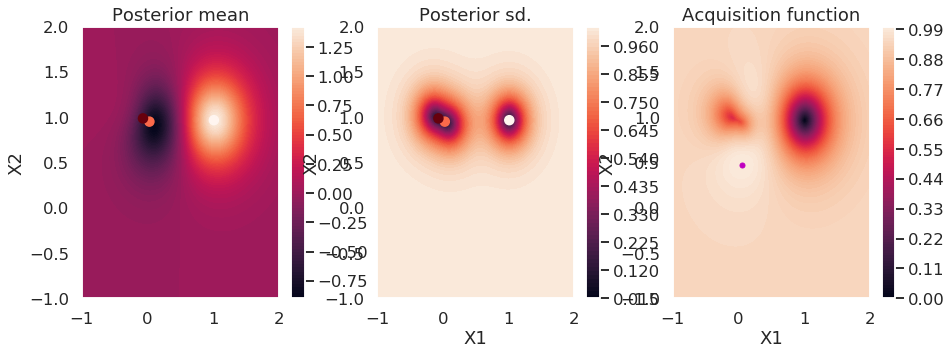

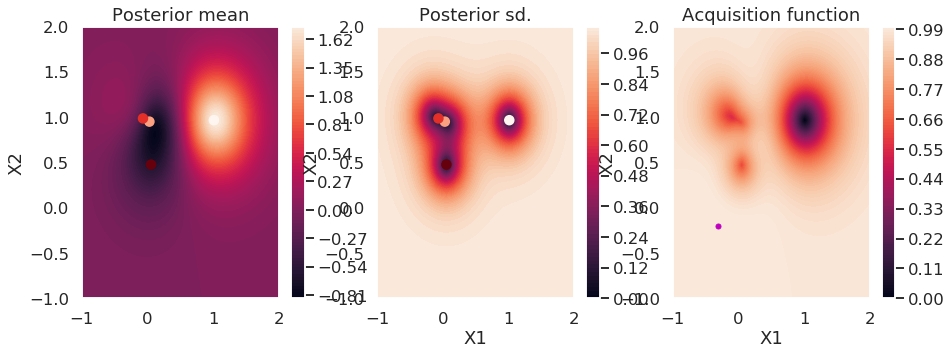

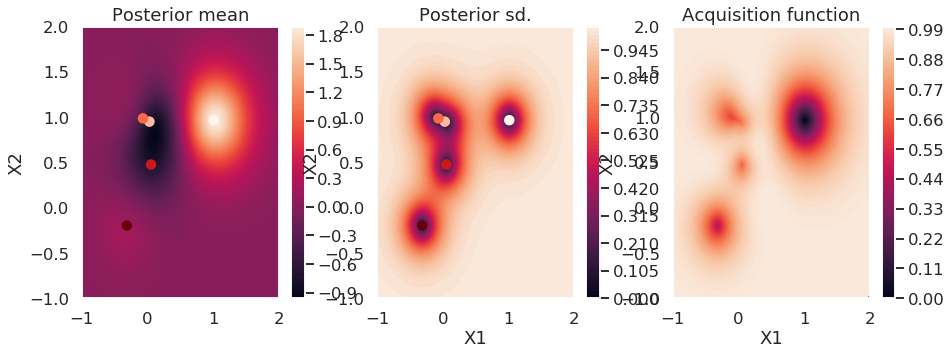

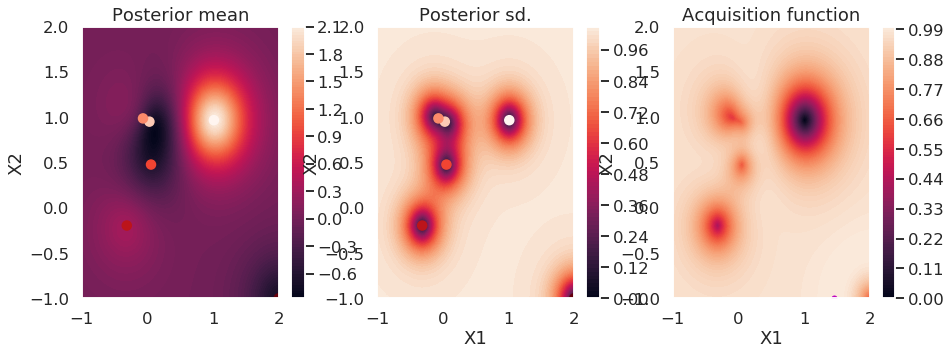

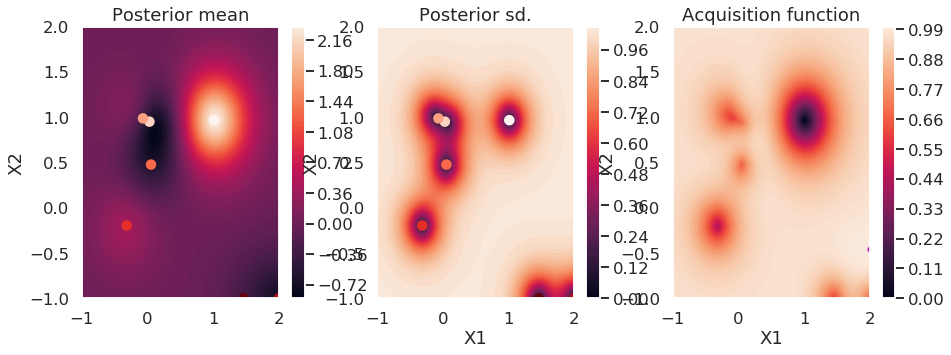

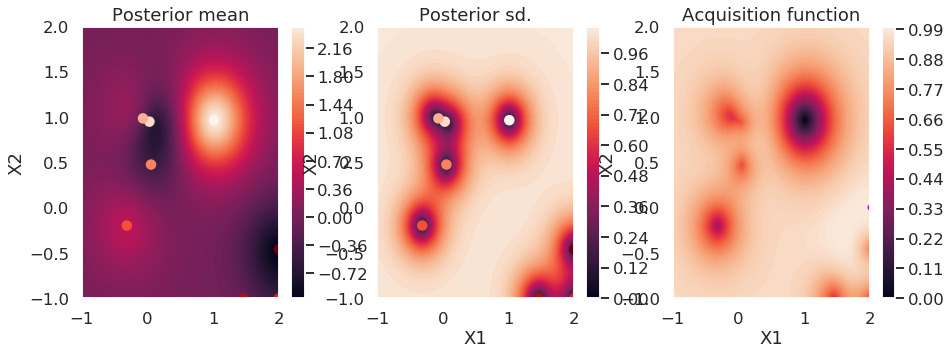

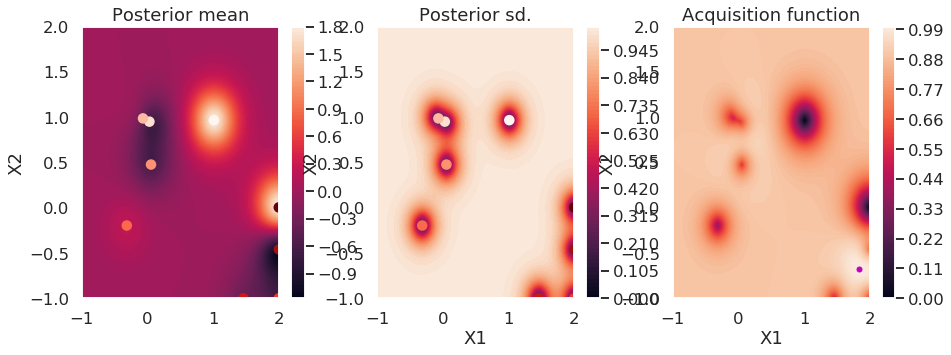

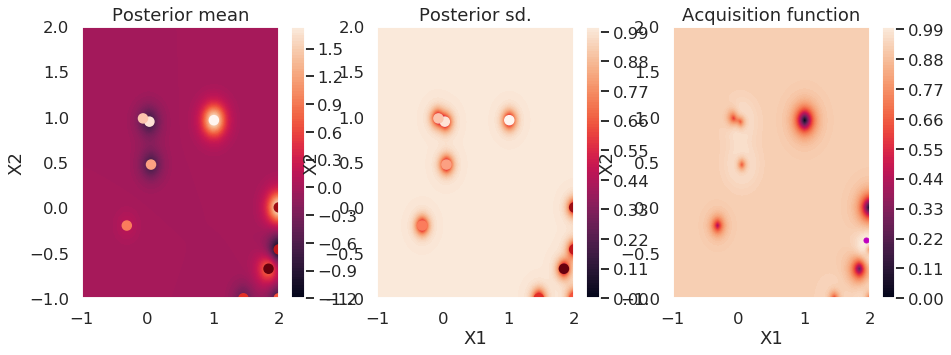

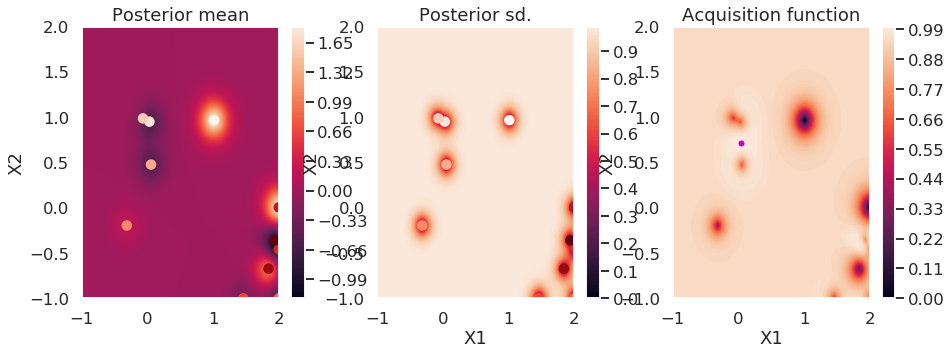

In [23]:
# run for num_iter iterations
num_iter = 10
for i in range(num_iter):
    myBopt.run_optimization(max_iter, max_time, eps)                     
    myBopt.plot_acquisition()

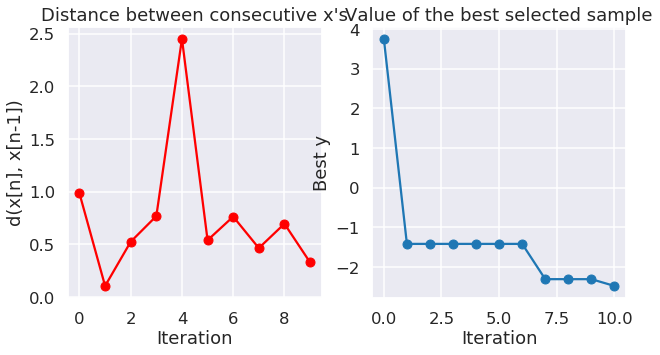

Optimal x value = [ 1.94220255 -0.36046751]
Minimized function value = -2.47211


In [24]:
myBopt.plot_convergence()
print(f'Optimal x value = {myBopt.x_opt}')
print(f'Minimized function value = {myBopt.fx_opt:.5f}')

### Matern32:

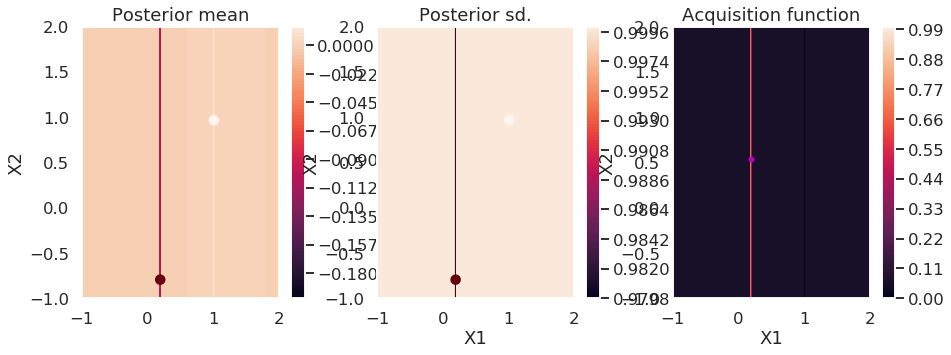

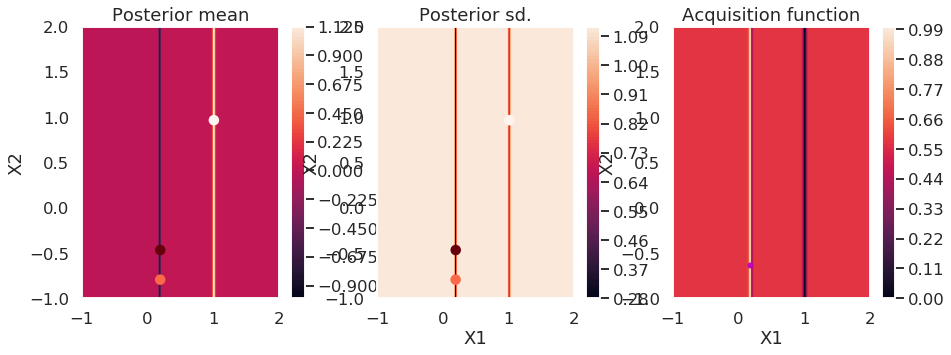

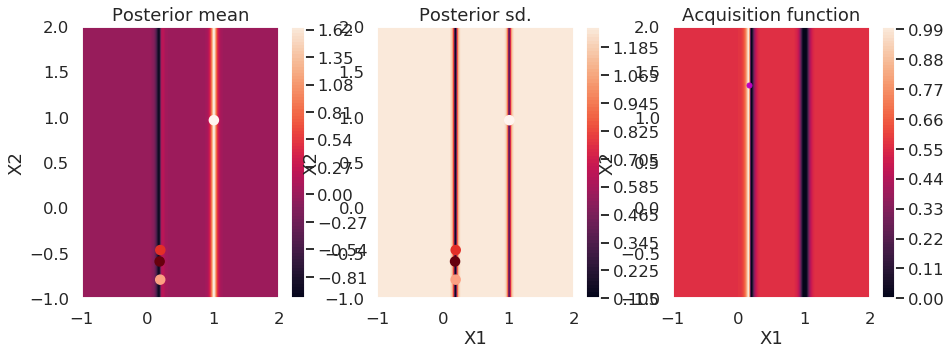

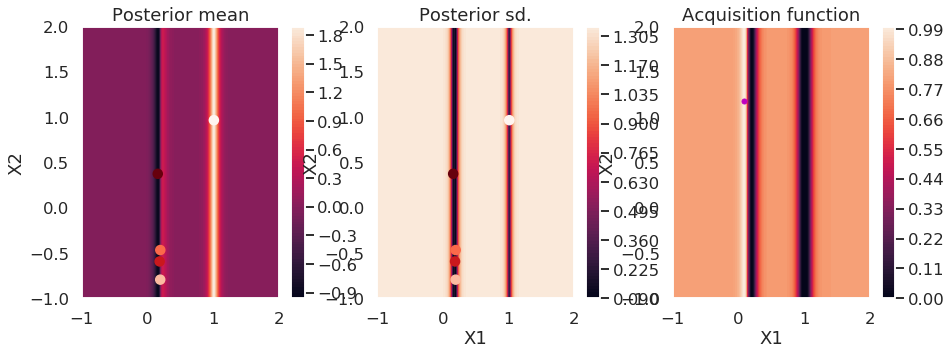

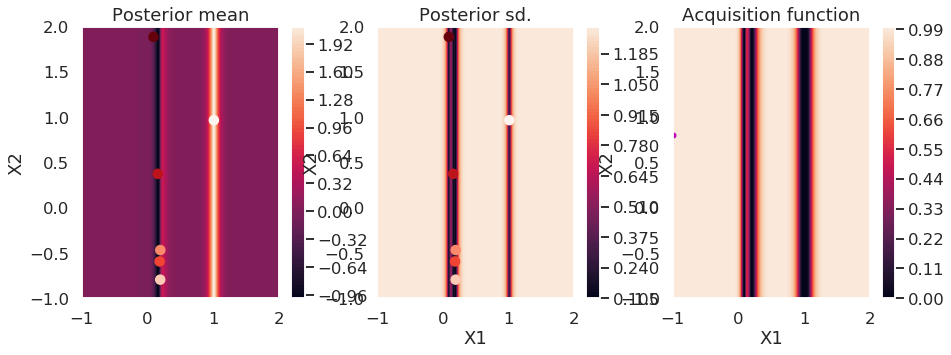

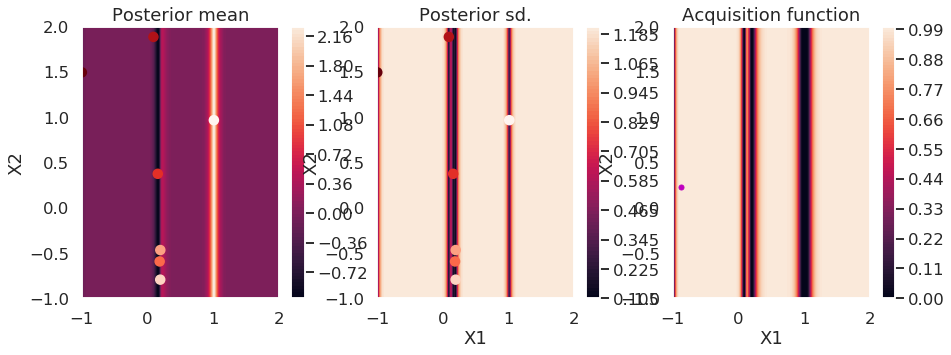

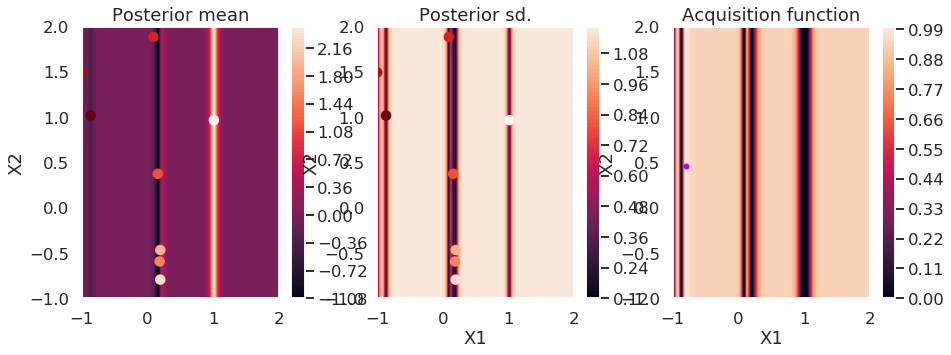

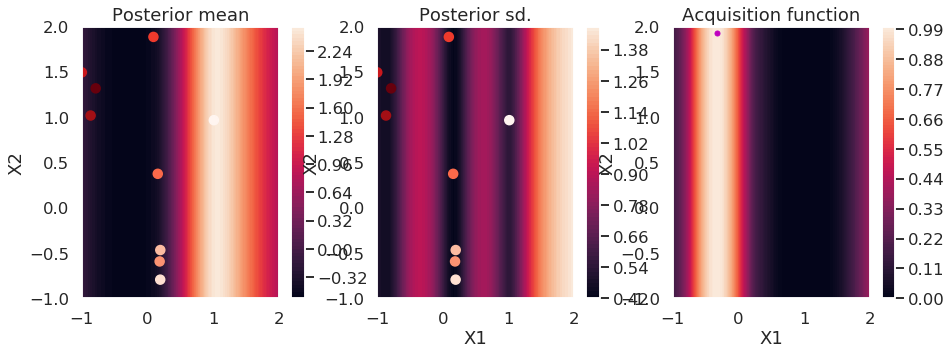

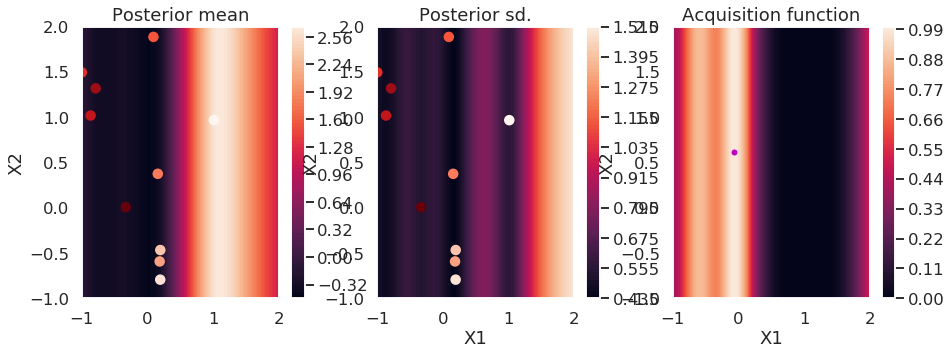

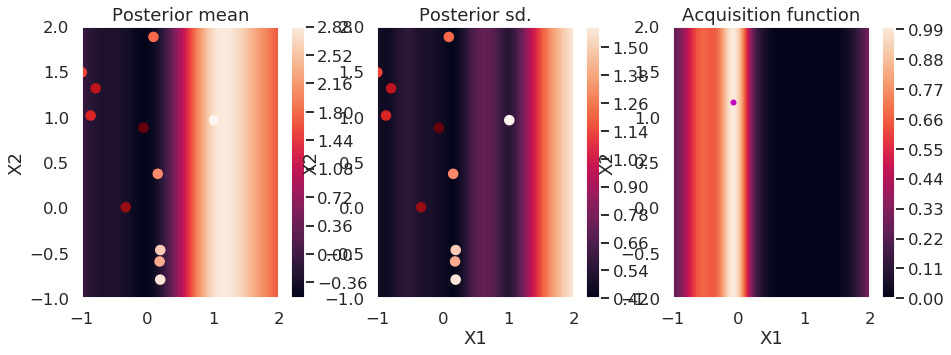

In [25]:
bounds = [{'name': 'x_1', 'type': 'continuous', 'domain': (xmin,xmax)},
         {'name': 'x_2', 'type': 'continuous', 'domain': (xmin,xmax)}]
my_acquisition_type = 'EI'
#my_acquisition_type = 'LCB'

GPkernel = GPy.kern.Matern32(input_dim=1, variance=1.0, lengthscale=1.0)
optimizer = GPyOpt.methods.BayesianOptimization(f=langermann, 
                                 model_type='GP',
                                 kernel=GPkernel, 
                                 initial_design_numdata=1, # Start with two initial data
                                 domain=bounds,            # box-constraints of the problem
                                 acquisition_type=my_acquisition_type, # Selects acquisition type
                                 exact_feval = False) 

np.random.seed(123)   # (123)
max_iter = 1      # evaluation budget (max_iter=1 means one step at a time)
max_time = 60     # time budget 
eps      = 1.e-6  # minimum allowed distance between the last two observations
# run for num_iter iterations
num_iter = 10
for i in range(num_iter):
    optimizer.run_optimization(max_iter, max_time, eps)                     
    optimizer.plot_acquisition()

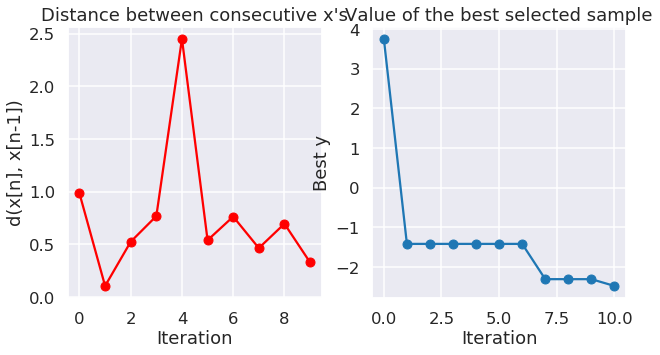

Optimal x value = [ 1.94220255 -0.36046751]
Minimized function value = -2.47211


In [26]:
myBopt.plot_convergence()
print(f'Optimal x value = {myBopt.x_opt}')
print(f'Minimized function value = {myBopt.fx_opt:.5f}')

In [27]:
# parameter bound(s) 
bounds = [{'name': 'x_1', 'type': 'continuous', 'domain': (xmin,xmax)},
         {'name': 'x_2', 'type': 'continuous', 'domain': (xmin,xmax)}]
# We'll consider two choices for the acquisition function, expectived 
#  improvement (EI) and lower confidence bound (LCB)
#my_acquisition_type = 'EI'
my_acquisition_type = 'LCB'

# Creates GPyOpt object with the model and aquisition function
myBopt = GPyOpt.methods.BayesianOptimization(\
            f=langermann,                  # function to optimize   
            initial_design_numdata=1, # Start with two initial data
            domain=bounds,            # box-constraints of the problem
            acquisition_type=my_acquisition_type, # Selects acquisition type
            exact_feval = True) 
# Run the optimization
np.random.seed(123)   # (123)
max_iter = 1      # evaluation budget (max_iter=1 means one step at a time)
max_time = 60     # time budget 
eps      = 1.e-6  # minimum allowed distance between the last two observations

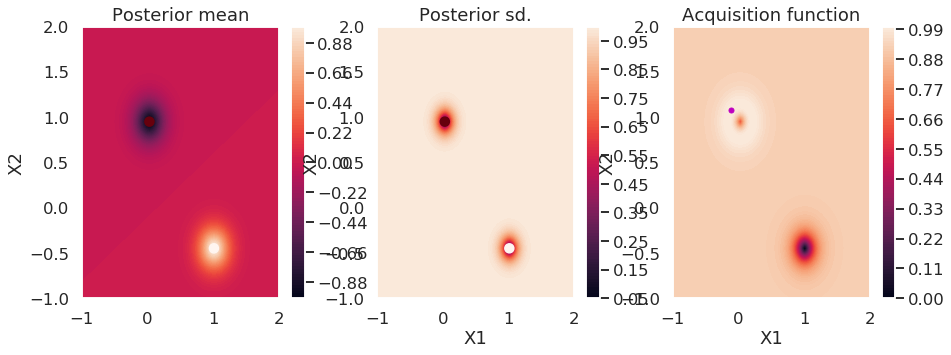

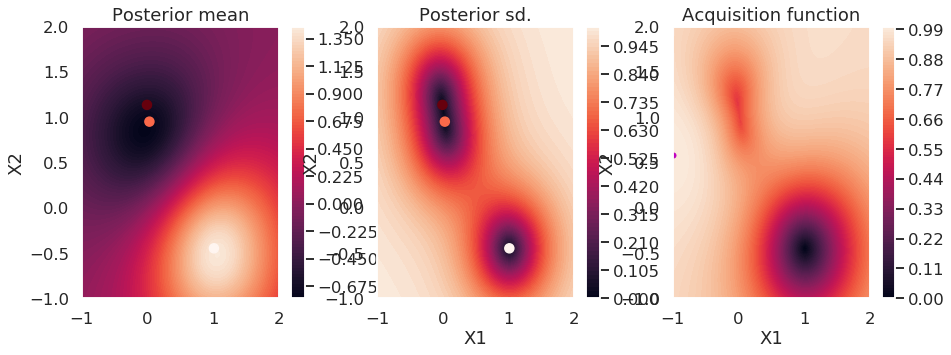

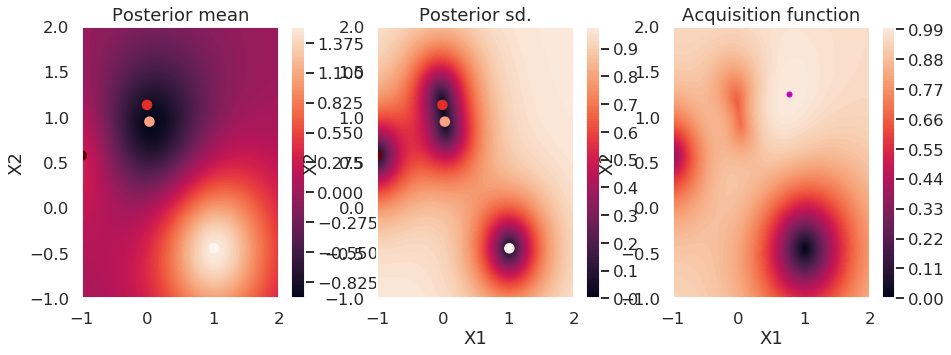

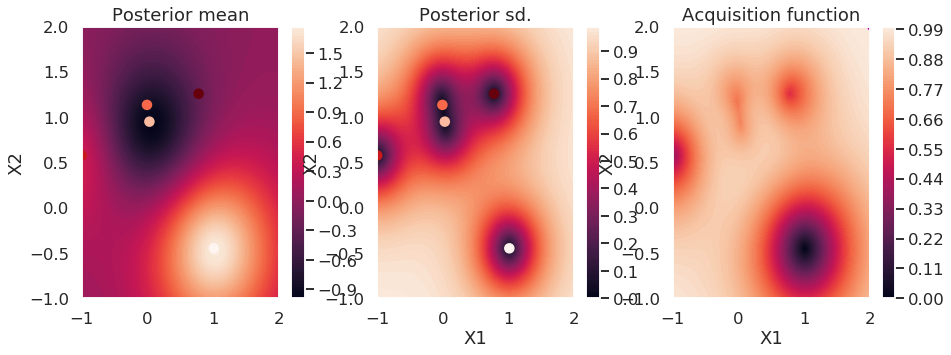

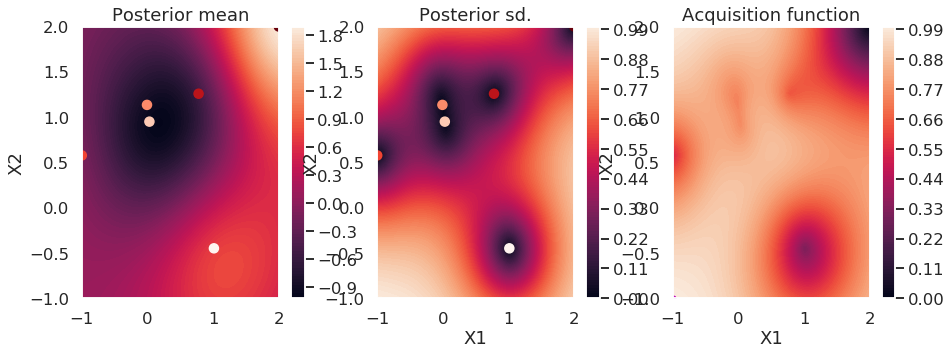

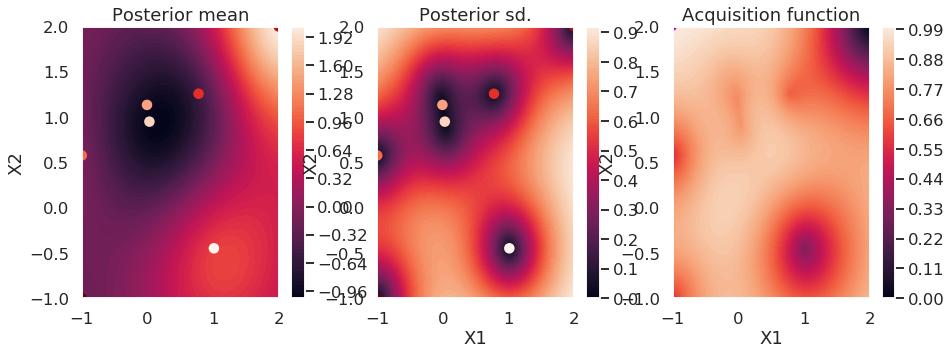

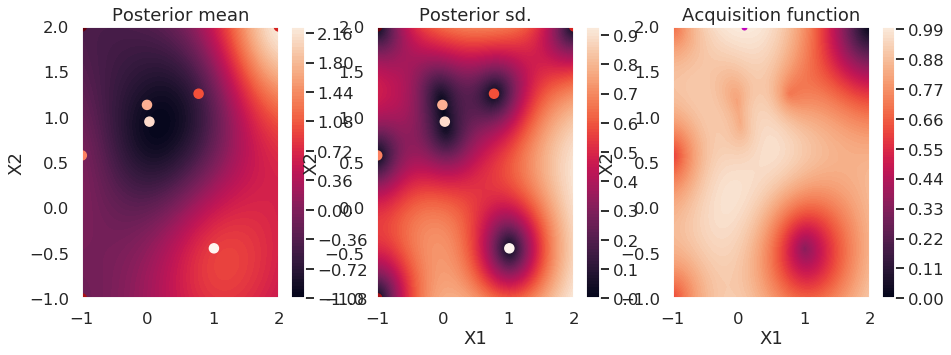

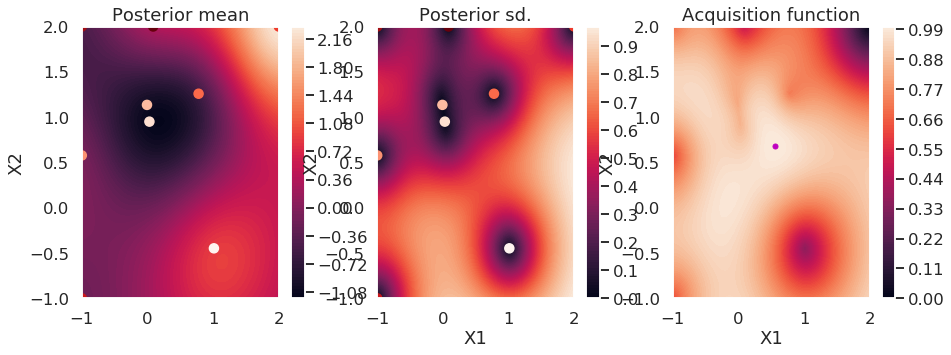

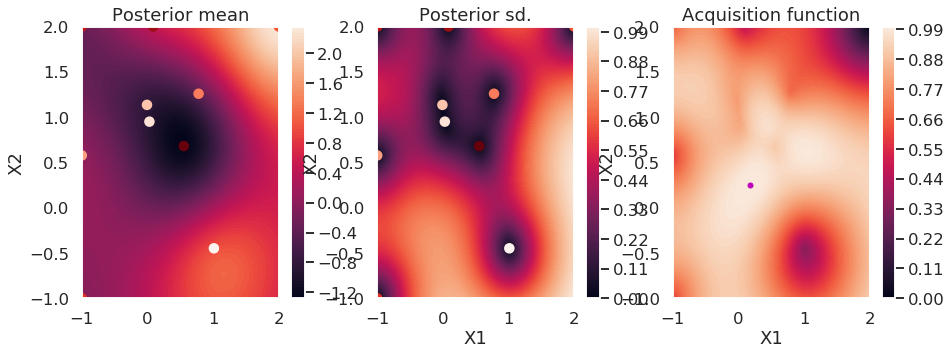

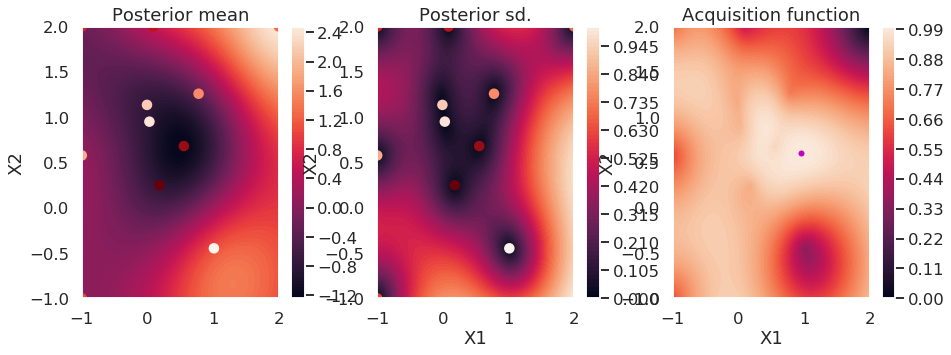

In [28]:
# run for num_iter iterations
num_iter = 10
for i in range(num_iter):
    myBopt.run_optimization(max_iter, max_time, eps)                     
    myBopt.plot_acquisition()

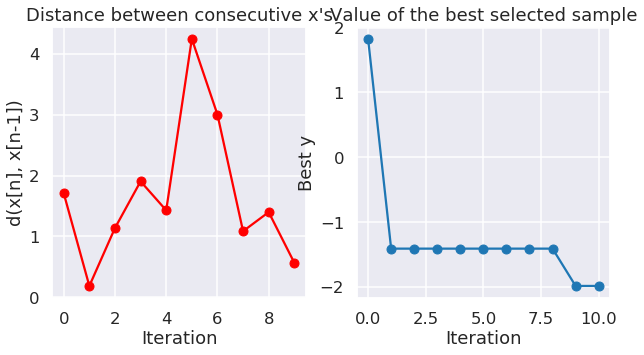

Optimal x value = [0.55327214 0.68044048]
Minimized function value = -1.98983


In [29]:
myBopt.plot_convergence()
print(f'Optimal x value = {myBopt.x_opt}')
print(f'Minimized function value = {myBopt.fx_opt:.5f}')